# Análise dos dados

In [3]:
import pandas as pd
import numpy as np

# decompactar dados do Datasus
from dbfread import DBF
import datasus_dbc

# Visualização de dadoS
import matplotlib.pyplot as plt
import seaborn as sns
import kuka

# import zlib
# import io
# import os

### Ano 2013

In [4]:
def pathnameCSV(name):
    return f'./datasets/csv/{name}.csv'

In [5]:
df_2013 = pd.read_csv(pathnameCSV('POBR2013'), dtype=str)

In [6]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180668 entries, 0 to 180667
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ANO_DIAGN   180668 non-null  object
 1   ANOMES_DIA  180668 non-null  object
 2   ANO_TRATAM  174345 non-null  object
 3   ANOMES_TRA  174345 non-null  object
 4   UF_RESID    180668 non-null  object
 5   MUN_RESID   180668 non-null  object
 6   UF_TRATAM   174345 non-null  object
 7   MUN_TRATAM  174345 non-null  object
 8   UF_DIAGN    180668 non-null  object
 9   MUN_DIAG    180668 non-null  object
 10  TRATAMENTO  180668 non-null  object
 11  DIAGNOSTIC  180668 non-null  object
 12  IDADE       180668 non-null  object
 13  SEXO        180668 non-null  object
 14  ESTADIAM    159451 non-null  object
 15  CNES_DIAG   180668 non-null  object
 16  CNES_TRAT   174345 non-null  object
 17  TEMPO_TRAT  174432 non-null  object
 18  CNS_PAC     0 non-null       object
 19  DIAG_DETH   180668 non-

In [7]:
df_2013.head(5)

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,2013,201312,2013,201311,29,293190,29,292740,29,291080,...,F,5,2601680,0003859,-0018,NaN,C71,09/12/2013,21/11/2013,23/09/2003
1,2013,201302,2013,201303,41,412625,41,411520,41,411520,...,F,NaN,2586797,2586797,+0028,NaN,C71,01/02/2013,01/03/2013,05/12/1976
2,2013,201303,2014,201406,35,354390,35,353870,35,353870,...,M,1,2772310,2772310,+0478,NaN,C61,04/03/2013,25/06/2014,10/11/1950
3,2013,201301,2016,201601,35,351880,35,355030,35,355030,...,M,4,6123740,6123740,+1070,NaN,C61,29/01/2013,04/01/2016,24/04/1941
4,2013,201305,2013,201306,43,431490,43,431490,43,431490,...,F,3,2237253,2262568,+0033,NaN,C53,08/05/2013,10/06/2013,09/08/1977


Vamos definir os tipos das colunas:

In [8]:
column_types = {
    'ANO_DIAGN': 'int32',
    'ANOMES_DIA': 'object',
    'ANO_TRATAM': 'float32',
    'ANOMES_TRA': 'object',
    'UF_RESID': 'object',
    'MUN_RESID': 'object',
    'UF_TRATAM': 'object',
    'MUN_TRATAM': 'object',
    'UF_DIAGN': 'object',
    'MUN_DIAG': 'object',
    'TRATAMENTO': 'object',
    'DIAGNOSTIC': 'object',
    'IDADE': 'int32',
    'SEXO': 'object',
    'ESTADIAM': 'object',
    'CNES_DIAG': 'object',
    'CNES_TRAT': 'object',
    'TEMPO_TRAT': 'float32',
    'CNS_PAC': 'object',
    'DIAG_DETH': 'object',
    'DT_DIAG': 'datetime64[ns]',
    'DT_TRAT': 'datetime64[ns]',
    'DT_NASC': 'datetime64[ns]',
    'UF_RESID_SIGLA': 'object',
    'UF_DIAGN_SIGLA': 'object',
    'UF_TRATAM_SIGLA': 'object',
}
for col in df_2013.columns:
    df_2013[col] = df_2013[col].astype(column_types[col])

Vamos substituir os valores vazios/nulos `''` com `np.nan`

In [9]:
df_2013.replace('', np.nan, inplace=True)

In [10]:
df_2013.isnull().sum()

ANO_DIAGN          0
ANOMES_DIA         0
ANO_TRATAM      6323
ANOMES_TRA      6323
UF_RESID           0
MUN_RESID          0
UF_TRATAM       6323
MUN_TRATAM      6323
UF_DIAGN           0
MUN_DIAG           0
TRATAMENTO         0
DIAGNOSTIC         0
IDADE              0
SEXO               0
ESTADIAM       21217
CNES_DIAG          0
CNES_TRAT       6323
TEMPO_TRAT      6236
CNS_PAC       180668
DIAG_DETH          0
DT_DIAG            0
DT_TRAT         6323
DT_NASC            0
dtype: int64

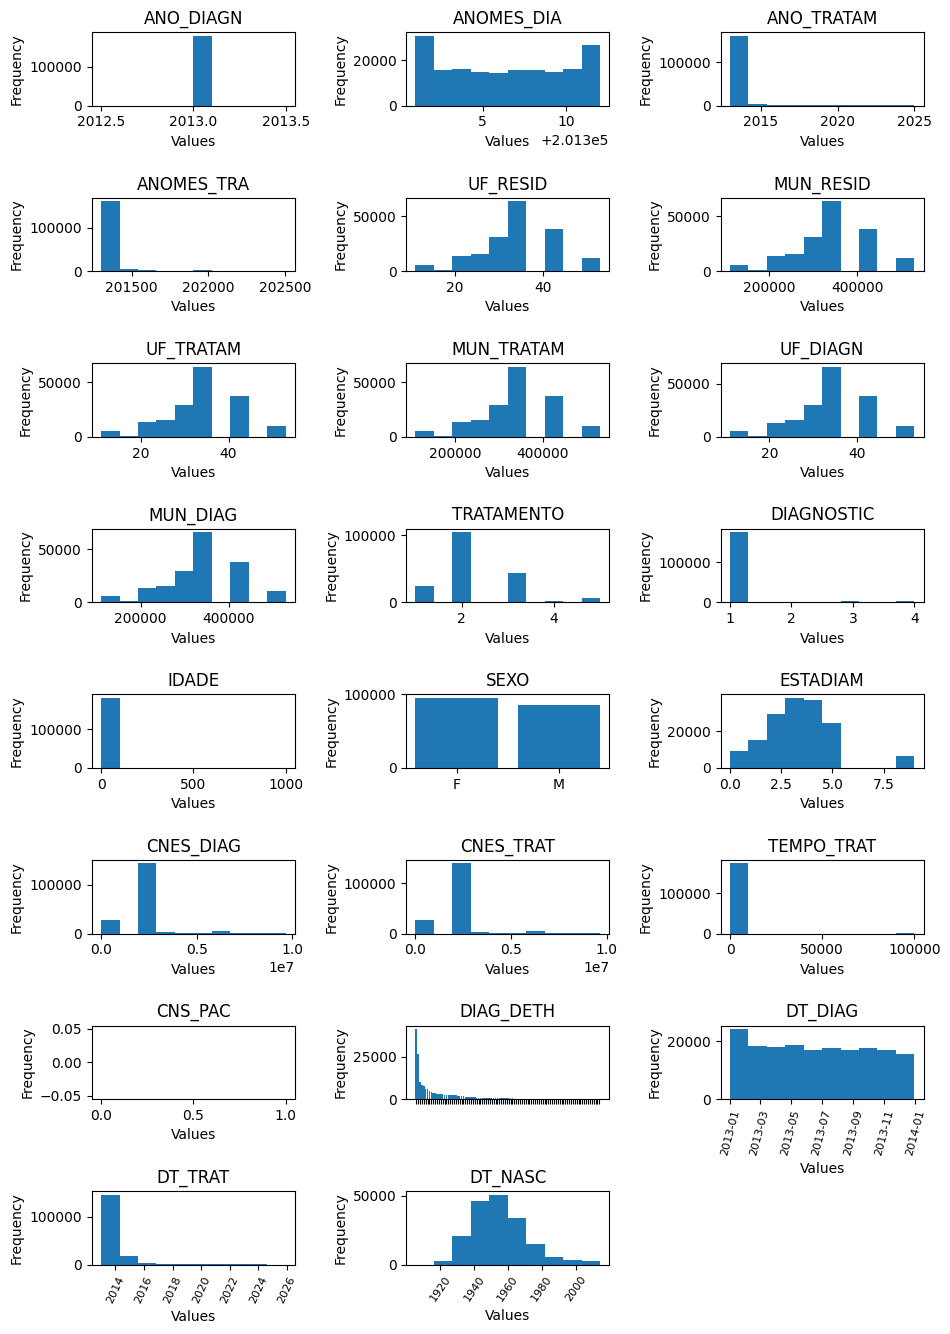

In [11]:
kuka.eda.plot_columns_dist(df_2013);

### Adicionado coluna: Sigla Estado

In [12]:
estados = pd.read_csv("./data/codigo_estados.csv")

In [13]:
mapa_estados = estados.set_index("Codigo_IBGE")["Sigla"]

# Garante que o índice do mapa é inteiro
mapa_estados.index = mapa_estados.index.astype(int)

mapa_estados

Codigo_IBGE
12    AC
27    AL
16    AP
13    AM
29    BA
23    CE
53    DF
32    ES
52    GO
21    MA
51    MT
50    MS
31    MG
15    PA
25    PB
41    PR
26    PE
22    PI
33    RJ
24    RN
43    RS
11    RO
14    RR
42    SC
35    SP
28    SE
17    TO
Name: Sigla, dtype: object

In [14]:
# Adiciona Código negativo para estados não mapeados
df_2013["UF_TRATAM"] = df_2013["UF_TRATAM"].fillna(-1)

In [15]:
# Garante que a coluna também é inteira
df_2013["UF_RESID"] = df_2013["UF_RESID"].astype(int)
df_2013["UF_DIAGN"] = df_2013["UF_DIAGN"].astype(int)
df_2013["UF_TRATAM"] = df_2013["UF_TRATAM"].astype(int)

In [16]:
df_2013["UF_TRATAM_SIGLA"] = df_2013["UF_TRATAM"].map(mapa_estados)
df_2013["UF_TRATAM_SIGLA"] = df_2013["UF_TRATAM_SIGLA"].fillna('N/A')

In [17]:
df_2013["UF_RESID_SIGLA"] = df_2013["UF_RESID"].map(mapa_estados)
df_2013["UF_DIAGN_SIGLA"] = df_2013["UF_DIAGN"].map(mapa_estados)

In [18]:
df_2013.head(10)

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC,UF_TRATAM_SIGLA,UF_RESID_SIGLA,UF_DIAGN_SIGLA
0,2013,201312,2013.0,201311,29,293190,29,292740,29,291080,...,0003859,-18.0,NaN,C71,2013-09-12,2013-11-21,2003-09-23,BA,BA,BA
1,2013,201302,2013.0,201303,41,412625,41,411520,41,411520,...,2586797,28.0,NaN,C71,2013-01-02,2013-01-03,1976-05-12,PR,PR,PR
2,2013,201303,2014.0,201406,35,354390,35,353870,35,353870,...,2772310,478.0,NaN,C61,2013-04-03,2014-06-25,1950-10-11,SP,SP,SP
3,2013,201301,2016.0,201601,35,351880,35,355030,35,355030,...,6123740,1070.0,NaN,C61,2013-01-29,2016-04-01,1941-04-24,SP,SP,SP
4,2013,201305,2013.0,201306,43,431490,43,431490,43,431490,...,2262568,33.0,NaN,C53,2013-08-05,2013-10-06,1977-09-08,RS,RS,RS
5,2013,201309,2013.0,201308,24,240810,24,240810,24,240810,...,8003629,-21.0,NaN,C71,2013-04-09,2013-08-14,1997-11-17,RN,RN,RN
6,2013,201304,NaN,NaN,28,280320,-1,NaN,28,280030,...,NaN,NaN,NaN,C50,2013-08-04,NaT,1974-07-23,N/A,SE,SE
7,2013,201303,2013.0,201310,41,410690,41,410690,41,410690,...,0015644,205.0,NaN,C50,2013-03-25,2013-10-16,1976-09-18,PR,PR,PR
8,2013,201307,2013.0,201308,35,355030,35,355030,35,355030,...,2066572,20.0,NaN,C16,2013-12-07,2013-01-08,1939-09-01,SP,SP,SP
9,2013,201308,2014.0,201409,35,352180,35,352530,35,352530,...,2083086,393.0,NaN,C50,2013-08-28,2014-09-25,1943-08-09,SP,SP,SP


### Gráfico: Número de Casos por Estado de Residência

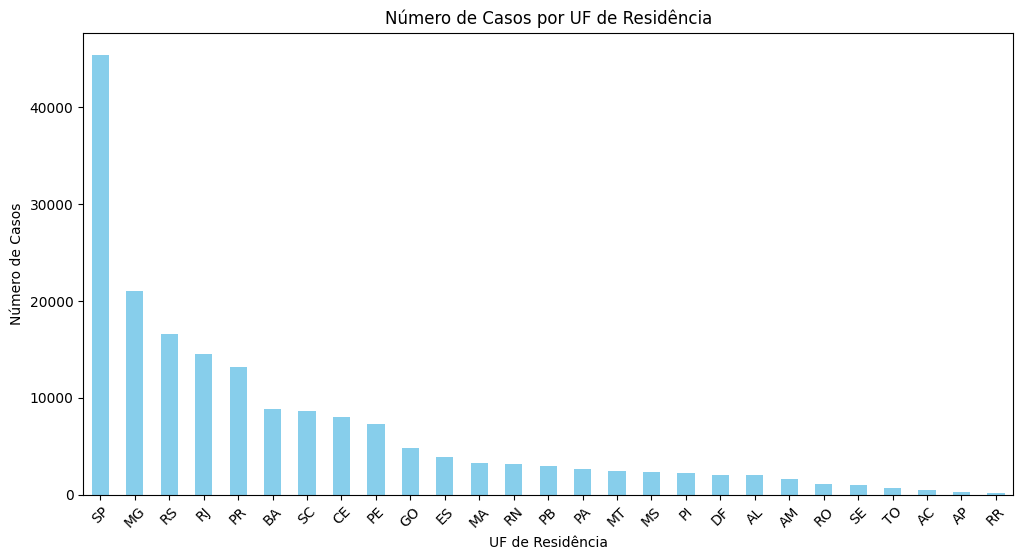

In [19]:
# Gerar gráfico de barras para comparar a proporção de casos por UF
df_2013['UF_RESID_SIGLA'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Número de Casos por UF de Residência')
plt.xlabel('UF de Residência')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

### Gráfico: Número de Casos por Estado de Tratamento

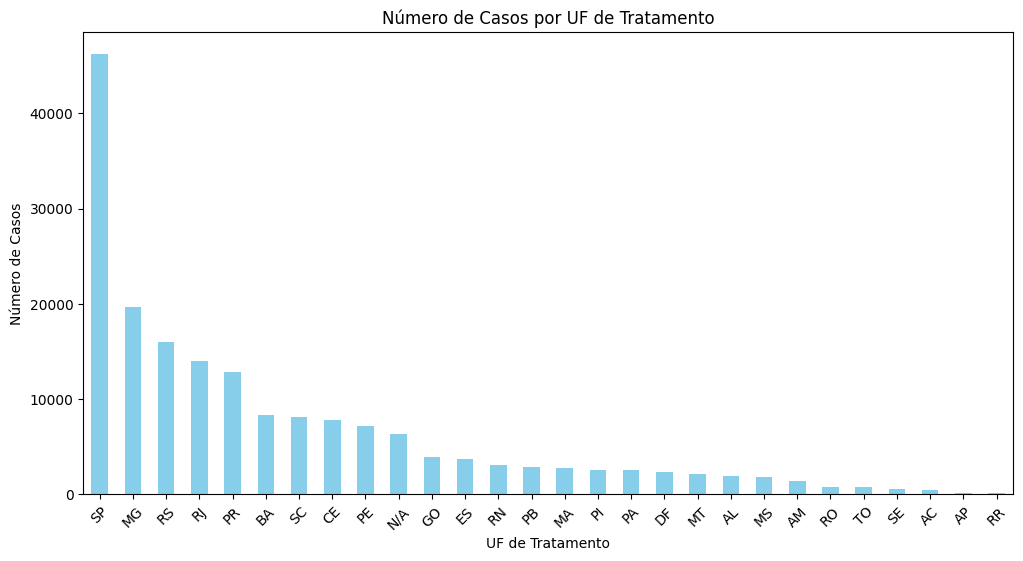

In [20]:
# Gerar gráfico de barras para comparar a proporção de casos por UF
df_2013['UF_TRATAM_SIGLA'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Número de Casos por UF de Tratamento')
plt.xlabel('UF de Tratamento')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

### Gráfico: Número de Casos por Estado do Diagnóstico

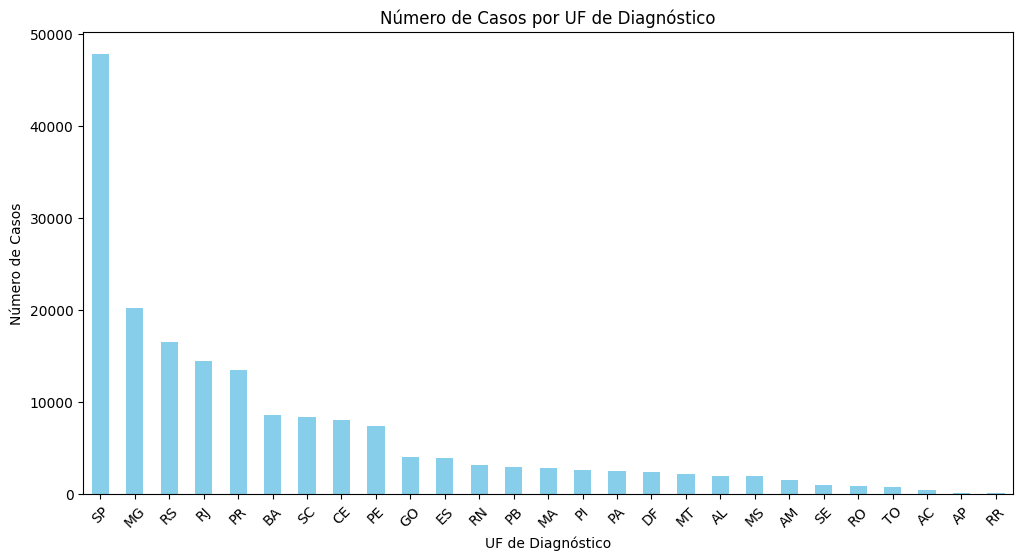

In [21]:
# Gerar gráfico de barras para comparar a proporção de casos por UF
df_2013['UF_DIAGN_SIGLA'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Número de Casos por UF de Diagnóstico')
plt.xlabel('UF de Diagnóstico')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

### Valores únicos - Tratamento

In [22]:
df_2013["TRATAMENTO"].unique()

array(['1', '3', '2', '5', '4'], dtype=object)

**Dicionário**

- 1 - CIRURGIA
- 2 - QUIMIOTERAPIA
- 3 - RADIOTERAPIA
- 4 - AMBOS
- 5 - Sem informação de tratamento

Fonte dos Dados - [Datasus](http://tabnet.datasus.gov.br/cgi/dhdat.exe?PAINEL_ONCO/PAINEL_ONCOLOGIABR.def)

### Valores únicos - Diagnóstico

In [23]:
df_2013["DIAGNOSTIC"].unique()

array(['01', '04', '03', '02'], dtype=object)

**Dicionário**

- 01 - Neoplasias Malignas (Lei no 12.732/12)
- 02 - Neoplasias in situ
- 03 - Neoplasias de comportamento incerto ou desconhecido
- 04 - C44+C73

Fonte dos Dados - [Datasus](http://tabnet.datasus.gov.br/cgi/dhdat.exe?PAINEL_ONCO/PAINEL_ONCOLOGIABR.def)

### Valores únicos - Estágio

Estágio do Câncer no tratamento (I, II, III, IV, não aplicável, desconhecido)

In [24]:
df_2013["ESTADIAM"].unique()

array(['5', nan, '1', '4', '3', '9', '2', '0'], dtype=object)

**Dicionário**

- C00 - Neoplasia maligna do lábio
- C01 - Neoplasia maligna da base da língua
- C02 - Neoplasia maligna de outras partes e de partes não especificadas da língua
- C03 - Neoplasia maligna da gengiva
- C04 - Neoplasia maligna do assoalho da boca
- C05 - Neoplasia maligna do palato
- C06 - Neoplasia maligna de outras partes e de partes não especificadas da boca
- C07 - Neoplasia maligna da glândula parótida
- C08 - Neoplasia maligna de outras glândulas salivares maiores e as não especificadas
- C09 - Neoplasia maligna da amígdala
- C10 - Neoplasia maligna da orofaringe
- C11 - Neoplasia maligna da nasofaringe
- C12 - Neoplasia maligna do seio piriforme
- C13 - Neoplasia maligna da hipofaringe
- C14 - Neoplasia maligna de outras localizações e de localizações mal definida, do lábio, cavidade oral
- C15 - Neoplasia maligna do esôfago
- C16 - Neoplasia maligna do estômago
- C17 - Neoplasia maligna do intestino delgado
- C18 - Neoplasia maligna do cólon
- C19 - Neoplasia maligna da junção retossigmóide
- C20 - Neoplasia maligna do reto
- C21 - Neoplasia maligna do ânus e do canal anal
- C22 - Neoplasia maligna do fígado e das vias biliares intra-hepáticas
- C23 - Neoplasia maligna da vesícula biliar
- C24 - Neoplasia maligna de outras partes, e de partes não especificadas das vias biliares
- C25 - Neoplasia maligna do pâncreas
- C26 - Neoplasia maligna de outros órgãos digestivos e de localizações mal definidas no aparelho digestivo
- C30 - Neoplasia maligna da cavidade nasal e do ouvido médio
- C31 - Neoplasia maligna dos seios da face
- C32 - Neoplasia maligna da laringe
- C33 - Neoplasia maligna da traquéia
- C34 - Neoplasia maligna dos brônquios e dos pulmões
- C37 - Neoplasia maligna do timo
- C38 - Neoplasia maligna do coração, mediastino e pleura
- C39 - Neoplasia maligna de outras localizações e de localizações mal definidas do aparelho respiratório
- C40 - Neoplasia maligna dos ossos e cartilagens articulares dos membros
- C41 - Neoplasia maligna dos ossos e das cartilagens articulares de outras localizações e de localizações mal definidas
- C43 - Melanoma maligno da pele
- C44 - Outras neoplasias malignas da pele
- C45 - Mesotelioma
- C46 - Sarcoma de Kaposi
- C47 - Neoplasia maligna dos nervos periféricos e do sistema nervoso autônomo
- C48 - Neoplasia maligna dos tecidos moles do retroperitônio e do peritônio
- C49 - Neoplasia maligna do tecido conjuntivo e de outros tecidos moles
- C50 - Neoplasia maligna da mama
- C51 - Neoplasia maligna da vulva
- C52 - Neoplasia maligna da vagina
- C53 - Neoplasia maligna do colo do útero
- C54 - Neoplasia maligna do corpo do útero
- C55 - Neoplasia maligna do útero, porção não especificada
- C56 - Neoplasia maligna do ovário
- C57 - Neoplasia maligna de outros órgãos genitais femininos e dos não especificados
- C58 - Neoplasia maligna da placenta
- C60 - Neoplasia maligna do pênis
- C61 - Neoplasia maligna da próstata
- C62 - Neoplasia maligna dos testículos
- C63 - Neoplasia maligna de outros órgãos genitais masculinos e dos não especificados
- C64 - Neoplasia maligna do rim, exceto pelve renal
- C65 - Neoplasia maligna da pelve renal
- C66 - Neoplasia maligna dos ureteres
- C67 - Neoplasia maligna da bexiga
- C68 - Neoplasia maligna de outros órgãos urinários e dos não especificados
- C69 - Neoplasia maligna do olho e anexos
- C70 - Neoplasia maligna das meninges
- C71 - Neoplasia maligna do encéfalo
- C72 - Neoplasia maligna da medula espinhal, dos nervos cranianos e de outras partes do sistema nervoso
- C73 - Neoplasia maligna da glândula tireóide
- C74 - Neoplasia maligna da glândula supra-renal [glândula adrenal]
- C75 - Neoplasia maligna de outras glândulas endócrinas e de estruturas relacionadas
- C76 - Neoplasia maligna de outras localizações e de localizações mal definidas
- C77 - Neoplasia maligna secundária e não especificada dos gânglios linfáticos
- C78 - Neoplasia maligna secundária dos órgãos respiratórios e digestivos
- C79 - Neoplasia maligna secundária de outras localizações
- C80 - Neoplasia maligna, sem especificação de localização
- C81 - Doença de Hodgkin
- C82 - Linfoma não-Hodgkin, folicular (nodular)
- C83 - Linfoma não-Hodgkin difuso
- C84 - Linfomas de células T cutâneas e periféricas
- C85 - Linfoma não-Hodgkin de outros tipos e de tipo não especificado
- C88 - Doenças imunoproliferativas malignas
- C90 - Mieloma múltiplo e neoplasias malignas de plasmócitos
- C91 - Leucemia linfóide
- C92 - Leucemia mielóide
- C93 - Leucemia monocítica
- C94 - Outras leucemias de células de tipo especificado
- C95 - Leucemia de tipo celular não especificado
- C96 - Outras neoplasias malignas e as não especificadas dos tecidos linfático, hematopoético e tecidos relacionados
- C97 - Neoplasias malignas de localizações múltiplas independentes (primárias)
- D00 - Carcinoma in situ da cavidade oral, do esôfago e do estômago
- D01 - Carcinoma in situ de outros órgãos digestivos
- D02 - Carcinoma in situ do ouvido médio e do aparelho respiratório
- D03 - Melanoma in situ
- D04 - Carcinoma in situ da pele
- D05 - Carcinoma in situ da mama
- D06 - Carcinoma in situ do colo do útero (cérvix)
- D07 - Carcinoma in situ de outros órgãos genitais e dos não especificados
- D09 - Carcinoma in situ de outras localizações e das não especificadas
- D37 - Neoplasia de comportamento incerto ou desconhecido da cavidade oral e dos órgãos digestivos
- D38 - Neoplasia de comportamento incerto ou desconhecido do ouvido médio e dos órgãos respiratórios
- D39 - Neoplasia de comportamento incerto ou desconhecido dos órgãos genitais femininos
- D40 - Neoplasia de comportamento incerto ou desconhecido dos órgãos genitais masculinos
- D41 - Neoplasia de comportamento incerto ou desconhecido dos órgãos urinários
- D42 - Neoplasia de comportamento incerto ou desconhecido das meninges
- D43 - Neoplasia de comportamento incerto ou desconhecido do encéfalo e do sistema nervoso central
- D44 - Neoplasia de comportamento incerto ou desconhecido das glândulas endócrinas
- D45 - Policitemia vera
- D46 - Síndromes mielodisplásicas
- D47 - Outras neoplasias de comportamento incerto ou desconhecido dos tecidos linfático, hematopoéti
- D48 - Neoplasia de comportamento incerto ou desconhecido de outras localizações e de localizações não especificadas

Fonte dos Dados - [Datasus](http://tabnet.datasus.gov.br/cgi/dhdat.exe?PAINEL_ONCO/PAINEL_ONCOLOGIABR.def)

In [25]:
df_2013["DIAG_DETH"].value_counts().head(25)

DIAG_DETH
C50    41361
C61    26684
C53    10092
C34     8151
C18     7902
C20     6072
C16     5722
C15     4541
C79     4238
C83     3809
C32     3665
C92     3108
C54     2988
C44     2952
C67     2822
C91     2635
C56     2615
C10     2560
C71     2516
C90     2458
C49     2308
C80     2290
C81     1854
C25     1753
C02     1567
Name: count, dtype: int64

In [26]:
df_2013["DIAG_DETH"].value_counts().tail(10)

DIAG_DETH
C94    16
D40    15
D37    15
C33    10
C95     9
C39     9
D42     9
D05     7
C45     4
D38     1
Name: count, dtype: int64

### Valores únicos - Diagnóstico Detalhado

In [27]:
df_2013["DIAG_DETH"].unique()

array(['C71', 'C61', 'C53', 'C50', 'C16', 'C15', 'C64', 'C67', 'C07',
       'C18', 'C62', 'C82', 'C32', 'C92', 'C79', 'C56', 'C80', 'C10',
       'C76', 'C20', 'C81', 'C54', 'C83', 'C02', 'C90', 'C04', 'C44',
       'C03', 'C77', 'C91', 'D47', 'C34', 'C25', 'C51', 'C21', 'C84',
       'C09', 'C40', 'C75', 'C93', 'C49', 'C94', 'C52', 'C60', 'C47',
       'C13', 'C96', 'D46', 'C46', 'C48', 'C74', 'C06', 'C85', 'C30',
       'C14', 'C43', 'C01', 'C05', 'C41', 'C72', 'D39', 'C00', 'C24',
       'C11', 'C58', 'C22', 'C17', 'D45', 'C88', 'C23', 'C31', 'C69',
       'C19', 'D48', 'C12', 'C70', 'C33', 'C73', 'C68', 'C08', 'D43',
       'D05', 'C57', 'C65', 'D06', 'D44', 'C66', 'C26', 'C38', 'C37',
       'C78', 'C95', 'C45', 'D40', 'C39', 'D37', 'D42', 'D38'],
      dtype=object)

### Diagnótico por Sexo

In [28]:
df_2013["SEXO"].value_counts()

SEXO
F    95327
M    85341
Name: count, dtype: int64

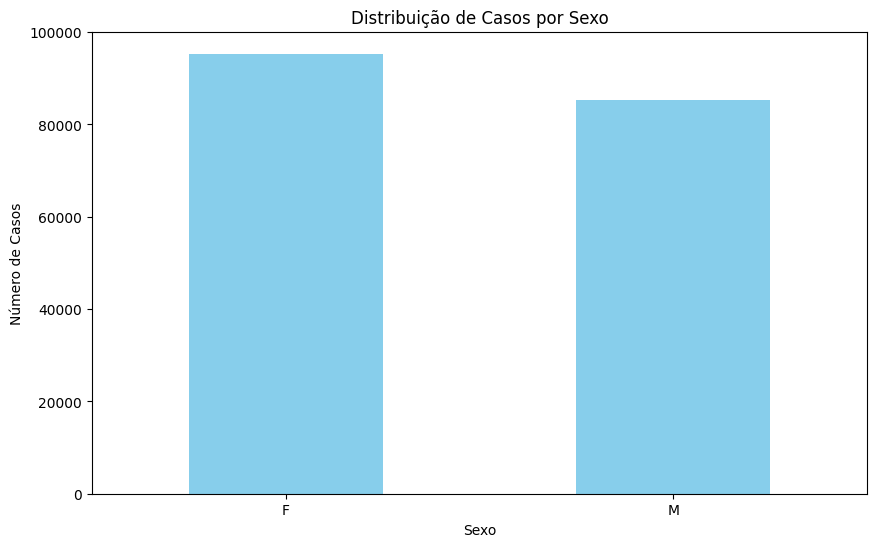

In [29]:
plt.figure(figsize=(10, 6))
df_2013["SEXO"].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Casos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)
plt.show()

### Medidas estatísticas

In [30]:
df_2013.describe()

,ANO_DIAGN,ANO_TRATAM,UF_RESID,UF_TRATAM,UF_DIAGN,IDADE,TEMPO_TRAT,DT_DIAG,DT_TRAT,DT_NASC
count,180668.0,174345.000000,180668.000000,180668.000000,180668.000000,180668.000000,174432.000000,180668,174345,180668
mean,2013.0,2013.531738,33.997886,32.750371,33.975347,57.868078,244.562897,2013-06-22 00:42:57.155888384,2013-12-20 03:28:31.138260480,1955-02-23 19:00:25.425642688
min,2013.0,2013.000000,11.000000,-1.000000,11.000000,0.000000,-90.000000,2013-01-01 00:00:00,2013-01-01 00:00:00,1905-06-18 00:00:00
25%,2013.0,2013.000000,29.000000,29.000000,31.000000,49.000000,21.000000,2013-03-20 00:00:00,2013-04-24 00:00:00,1943-10-26 00:00:00
50%,2013.0,2013.000000,35.000000,35.000000,35.000000,60.000000,61.000000,2013-06-19 00:00:00,2013-09-08 00:00:00,1953-04-03 00:00:00
75%,2013.0,2014.000000,41.000000,41.000000,41.000000,69.000000,140.000000,2013-09-24 00:00:00,2014-01-15 00:00:00,1963-12-13 00:00:00
max,2013.0,2025.000000,53.000000,53.000000,53.000000,999.000000,99999.000000,2013-12-31 00:00:00,2025-12-03 00:00:00,2014-05-29 00:00:00
std,0.0,1.359031,8.300007,10.253457,8.129589,16.963344,2279.498291,NaN,NaN,NaN


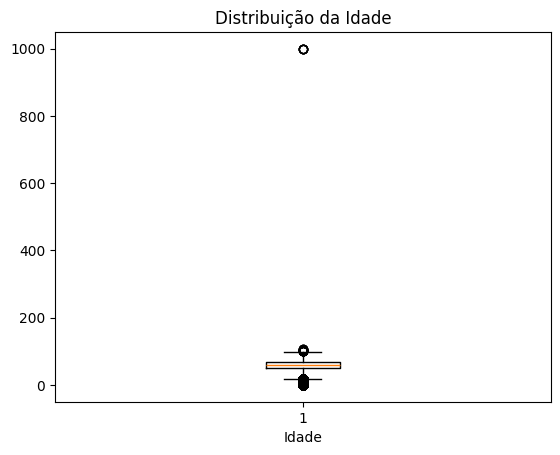

In [31]:
plt.boxplot(df_2013['IDADE'])
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.show()

...Temos algum paciente com uma idade bem acima do normal...

In [32]:
df_2013[df_2013['IDADE'] > 110][['IDADE', 'SEXO', 'UF_RESID_SIGLA', 'UF_DIAGN_SIGLA', 'UF_TRATAM_SIGLA']]

,IDADE,SEXO,UF_RESID_SIGLA,UF_DIAGN_SIGLA,UF_TRATAM_SIGLA
23751,999,M,PR,PR,PR
26347,999,F,SP,SP,SP
115380,999,M,SP,SP,SP
131604,999,F,GO,SP,SP
141714,999,M,SP,SP,SP


Limpeza da base de dados dos registros com IDADE = 999:

In [33]:
df_2013 = df_2013[df_2013['IDADE'] < 999]

# Hipóteses

## 1) Temos casos de Câncer de Mama em pessoas do Sexo Maculino?

In [34]:
df_2013[(df_2013["DIAG_DETH"] == "C50") & (df_2013["SEXO"] == "M")]["DIAG_DETH"].count()

np.int64(230)

No ano de 2013 tivemos pelo menos 230 pessoas do sexo masculino que foram disagnósticadas com Câncer de Mama (C50)

/var/folders/qp/skrztx8x5bsd_zvdsjwfxlhr0000gn/T/ipykernel_5978/1993776259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_mama_homens_estado.index, y=df_mama_homens_estado.values, palette="viridis")


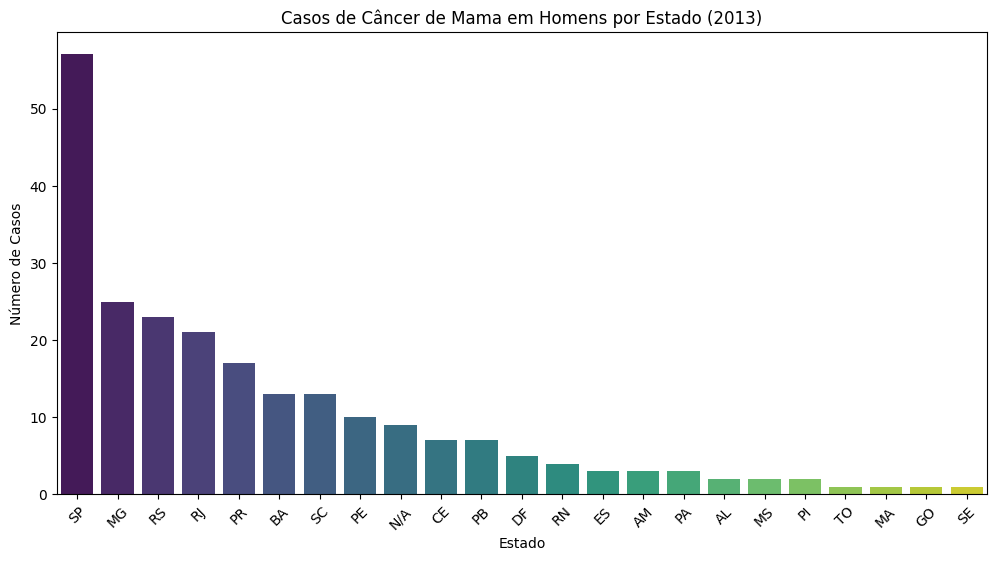

In [40]:
# Gerar gráfico de barras para casos de Câncer de Mama em homens por estado
df_mama_homens = df_2013[(df_2013["DIAG_DETH"] == "C50") & (df_2013["SEXO"] == "M")]
df_mama_homens_estado = df_mama_homens["UF_TRATAM_SIGLA"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=df_mama_homens_estado.index, y=df_mama_homens_estado.values, palette="viridis")
plt.title("Casos de Câncer de Mama em Homens por Estado (2013)")
plt.xlabel("Estado")
plt.ylabel("Número de Casos")
plt.xticks(rotation=45)
plt.show()

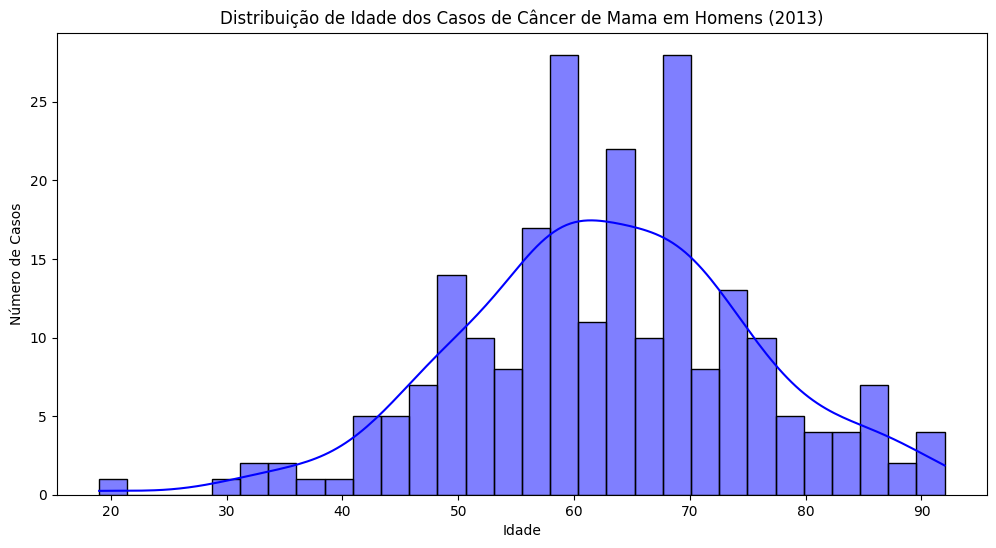

In [41]:
# Gerar gráfico de barras para casos de Câncer de Mama em homens por idade
plt.figure(figsize=(12, 6))
sns.histplot(df_mama_homens['IDADE'], bins=30, kde=True, color='blue')
plt.title("Distribuição de Idade dos Casos de Câncer de Mama em Homens (2013)")
plt.xlabel("Idade")
plt.ylabel("Número de Casos")
plt.show()  